In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
num_classes = 10

In [4]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [6]:
x_train /= 255
x_test /= 255

In [7]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
batch_size = 128
num_classes = 10
epochs = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [9]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [10]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

model.save('mnist.h5')
print("Saving the model as mnist.h5")

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.2454 - accuracy: 0.9244 - val_loss: 0.0510 - val_accuracy: 0.9834
Epoch 2/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0730 - accuracy: 0.9783 - val_loss: 0.0428 - val_accuracy: 0.9844
Epoch 3/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0521 - accuracy: 0.9838 - val_loss: 0.0334 - val_accuracy: 0.9893
Epoch 4/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0409 - accuracy: 0.9872 - val_loss: 0.0270 - val_accuracy: 0.9900
Epoch 5/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0340 - accuracy: 0.9894 - val_loss: 0.0269 - val_accuracy: 0.9911
Epoch 6/10
60000/60000 [==============================] - 985s 16ms/step - loss: 0.0295 - accuracy: 0.9906 - val_loss: 0.0275 - val_accuracy: 0.9907
Epoch 7/10
60000/60000 [==============================] - 3872s 65

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.026259683629100437
Test accuracy: 0.991599977016449


In [17]:
import matplotlib.pyplot as plt
import numpy as np

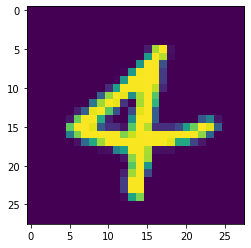

In [14]:
test_im = x_train[150]
plt.imshow(test_im.reshape(28,28), cmap='viridis', interpolation='none')



--------- Prediction --------- 




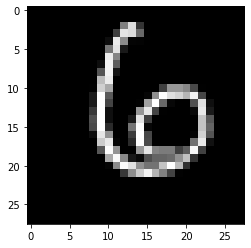



Final Output: 6


In [27]:
example = x_test[100]
prediction = model.predict(example.reshape(1,28,28,1))
print ("\n\n--------- Prediction --------- \n\n")
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
print("\n\nFinal Output: {}".format(np.argmax(prediction)))